3　リカード・モデルと日米産業別貿易

　労働生産性は二国間貿易に影響をもたらしているのか？「リカード・モデル」の理論的枠組みは、講義で説明した通りです。本例では教科書2章に基づき、リカード・モデルの可視化と分析を行います。以下では、日本生産性本部と米労働省から日本と米国の業種別労働生産性の相対比を算出し、これを財務省『貿易統計』からの業種別二国間貿易データをマッチングすることで、その２変数の関係を検証します。

　まず、分析に必要なライブラリをインポートします。今回使用するのはpandas、matplotlib他の4種類です。

In [1]:
#[1]ライブラリの読み込み
import pandas as pd
import matplotlib.pyplot as plt
import io #データ形式指定のライブラリのインポート
import requests

　続いて、日本・米国の(1)10業種の労働生産性、(2)業種別対米国輸出（輸入）額の6種類のマクロ経済データを、オンライン・ストレージから読み込みます。今回はGoogle Driveを使用します。ここで分析対象とする業種は、輸送機械、食品、電子機器、繊維、紙パルプ、化学、プラスチック、鉄鋼、非鉄金属、金属、の10業種です。出所は、（公財）日本生産性本部『生産性統計』、米労働省https://www.bls.gov/productivity/
です。

※データ読込みがエラーする場合は、プルダウンメニューの「ランタイム」→「ランタイムを接続解除して削除」を選択してライブラリの読み込みからやり直してください。

In [ ]:
#[2]データ読み込み
URL = "https://drive.google.com/uc?id=1GZRRRSXh4sGor7nL3ITt3JXXLXa_p8cL"
r = requests.get(URL)
df = pd.read_csv(io.BytesIO(r.content))#データ読込みの指示
df.head()#データ概要の表示

　上記のセルのデータ取得では、「業種名」がインデックス化されず、データとして読み込まれています。次のセルではこの「業種名」をインデックス化することで、可視化やデータ分析作業を効率化します。

In [ ]:
#[3]業種名のインデックス化
df = df.set_index("industry")#業種名をインデックスへ変更
df.head()

　続いて、このpandasを用いて、新変数を算出、定義します。日米の相対労働生産性（relative_productivity）は、2000年と2022年の労働生産性指数(2000年＝100）の比率の日米比です。産業内貿易比率（bi_export)はそれぞれの産業における日本の輸出と米国からの輸入の比率です。

In [ ]:
#[4]新しい変数の算出
df['relative_productivity'] = (df['Japan_productivity2022']/df['Japan_productivity2000'])/(df['US_productivity2022']/df['US_productivity2000'])
df['bi_export'] = df['JPN_export2022']/df['US_export2022']
df.head()

　最後に、横軸に「日本・米国の業種別労働生産性比」、縦軸に「業種別産業内貿易比率」の散布図を作成します。左上にマーカーがプロットされる産業は、米国よりも労働生産性が高く、輸出が輸入を上回る産業です。

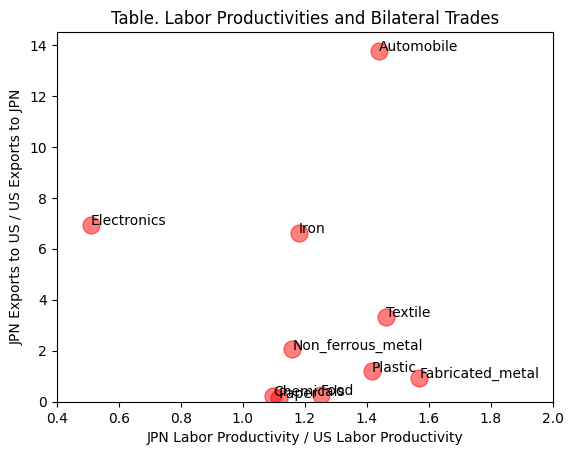

In [8]:
#[5]リカード・モデルの可視化
plt.scatter(df['relative_productivity'], df['bi_export'],c="r",s=150, alpha=0.5)
plt.xlim(0.4, 2.0)
plt.ylim(0,14.5)
plt.title("Table. Labor Productivities and Bilateral Trades")
plt.xlabel("JPN Labor Productivity / US Labor Productivity")
plt.ylabel("JPN Exports to US / US Exports to JPN")
for i, txt in enumerate(df.index.values):
    plt.annotate(txt, (df['relative_productivity'].values[i], df['bi_export'].values[i]))

In [ ]:
df['relative_productivity'].corr(df['bi_export'])